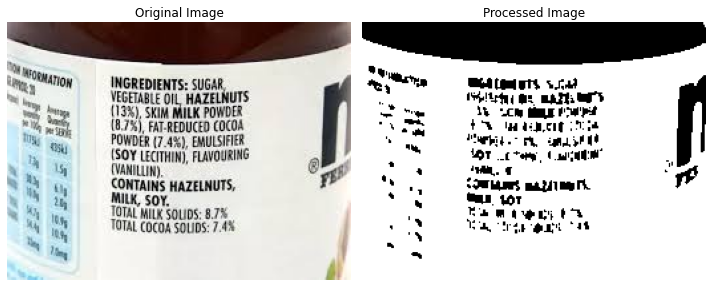

Extracted processed img Text:
Thom me
{a wane
Hed at
oT ay, Ca

fonts saute.
nor
amen tT
Pans

i
x


original img text:
me

°c

09
=

INGREDIENTS: SUGAR,
VESEARE OL nazis
(13%) SKM MLK POWDER
(17%) FarRepuce COCOA
POWDER (74%), ULSI
(SOY Lec), LAURIN
(van,
OnTAIMS HAZELNUTS,
MLK, SOY,
TOMA x Sous: 827%
TOTAL cocoa SOU: 7.48




In [29]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

# Function to preprocess image for improved OCR accuracy
def preprocess_image_for_ocr(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to improve text contrast
    _, thresh_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

    # Remove noise by applying a median blur
    processed_image = cv2.medianBlur(thresh_image, 3)
    
    return processed_image, cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

# Define the image path
image_path = "C:\\Users\\DC\\Desktop\\Sem 7\\NLP\\NLP PROJECT\\img3.jpg"

# Preprocess the image
processed_image, original_image = preprocess_image_for_ocr(image_path)

# Plotting the original and processed images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')  # Hide axes

# Processed Image
plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')  # Use 'gray' colormap for the processed image
plt.title("Processed Image")
plt.axis('off')  # Hide axes

# Show the images
plt.tight_layout()
plt.show()


# Perform OCR on the processed image
# Note: pytesseract can work directly with the NumPy array
text = pytesseract.image_to_string(processed_image)
text2=pytesseract.image_to_string(Image.open(image_path))
# Print the extracted text
print("Extracted processed img Text:")
print(text)
print("original img text:")
print(text2)

In [11]:
#img1 gray_scaling works best,blur is worst
#img2 gray_Scaling fails,thresh_image is ok,blur is worst

In [14]:
#histogram and other techniques

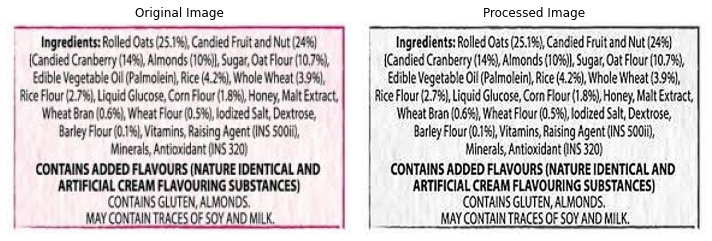

Extracted processed img Text:
Ingredients: Rolled Oats (25.1%), Cendied Fruit and Nut (24%)

{ {Candied Cranberry (149), Almonds (10%4)}, Sugar, Oat Flour (10.79),
Edible Vegetable Oil (Palmolein}, Rice (4.2%), Whole Wheat (3.9%),

Rice Flour {2.75 Liquid Glucose, Corn Flour (1.8%), Honey, Malt Extract,
Wheat Bran (0.6%), Wheat Flour (0.5%), fodized Salt, Dextrose,

Barley Flour 0.1%}, Vitamins, Raising Agent (INS 500i),
Minerals, Antioxidant (INS 320)
| CONTAINS ADDED FLAVOURS (NATURE IDENTICAL AND
| ARTIFICIAL CREAM FLAVOURING SUBSTANCES)

CONTAINS GLUTEN, ALMONDS,
MAY CONTAIN TRACES OF SOY AND MILK.

original img text:
Ingredients: Rolled Cts (2518) Canie Frutand Nut (248)
{Candied Cranberry (Almond (0 Sugar, Ot lu 1.7,
| _ Edible Vegetable i Pinon ice (4.2) Whole Whest 3.9%),
Fic Fou (27 Liquid Glucose, Corn ou (3 Honey Malt Etat,
‘het ran (6) Wheat For odd Sh Destro,
Bate Flou(01, Vitamins Rain Agent NS Sti,
ines, Antonia ONS 320)
| conta aooeD Favours NATURE IDENTICAL AND

ARTIFI

In [67]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import numpy as np

# Function to preprocess image for improved OCR accuracy
def preprocess_image_for_ocr(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    resized_image = cv2.resize(gray_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)   
    
   #Sharpening the Image
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    k=cv2.filter2D(resized_image, -1, kernel)
     
        
    return k, cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

# Define the image path
image_path = "C:\\Users\\DC\\Desktop\\Sem 7\\NLP\\NLP PROJECT\\img2.jpg"

# Preprocess the image
processed_image, original_image = preprocess_image_for_ocr(image_path)

# Plotting the original and processed images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')  # Hide axes

# Processed Image
plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')  # Use 'gray' colormap for the processed image
plt.title("Processed Image")
plt.axis('off')  # Hide axes

# Show the images
plt.tight_layout()
plt.show()


# Perform OCR on the processed image
# Note: pytesseract can work directly with the NumPy array
text = pytesseract.image_to_string(processed_image)
text2=pytesseract.image_to_string(Image.open(image_path))
# Print the extracted text
print("Extracted processed img Text:")
print(text)
print("original img text:")
print(text2)

In [68]:
#gausiaan blur worked little well in img1 and 3
#gray scaling and resize works best

In [69]:
import pandas as pd

# Load ingredient dataset
dataset_path = 'edited_temp.xlsx'
ingredient_data = pd.read_excel(dataset_path)


#ingredient_data = pd.read_csv(dataset_path)
# Create a dictionary mapping
ingredient_dict = ingredient_data.set_index('Ingredient').to_dict(orient='index')
print("Ingredient Dictionary Sample:", list(ingredient_dict.items())[:5])


Ingredient Dictionary Sample: [('corn flour', {'Category ': 'Natural', 'Description': 'Unprocessed'}), ('wheat flour', {'Category ': 'Natural', 'Description': 'Unprocessed'}), ('cocoa solids', {'Category ': 'Natural', 'Description': 'Unprocessed'}), ('Milk solids', {'Category ': 'Natural', 'Description': 'Unprocessed'}), ('edible palm oil', {'Category ': 'Natural', 'Description': 'Unprocessed'})]


In [75]:
from PIL import Image
import pytesseract
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re


# Preprocess text and detect ingredients
def preprocess_text(text, ingredient_dict):
    # Common OCR corrections
    
        
    # Clean text
    text = re.sub(r'[^A-Za-z0-9 ]+', ' ', text).lower()
    tokens = word_tokenize(text)
    
    # Multi-word matching
    matched_ingredients = set()
    max_ngram_length = max(len(ingredient.split()) for ingredient in ingredient_dict.keys())
    
    for n in range(1, max_ngram_length + 1):
        for ngram in ngrams(tokens, n):
            phrase = ' '.join(ngram)
            if phrase in ingredient_dict:
                matched_ingredients.add(phrase)
    
    return list(matched_ingredients)

# Classify ingredients
def classify_ingredients(ingredients, ingredient_dict):
    classifications = []
    for item in ingredients:
        if item in ingredient_dict:
            info = ingredient_dict[item]
            classifications.append({
                'Ingredient': item.capitalize(),
                'Category': info['Category'],
                'Description': info['Description']
            })
        else:
            classifications.append({
                'Ingredient': item.capitalize(),
                'Category': 'Unknown',
                'Description': 'Information not available'
            })
    return classifications

preprocess_text(text, ingredient_dict)
classify_ingredients(ingredients, ingredient_dict)

KeyError: 'Category'

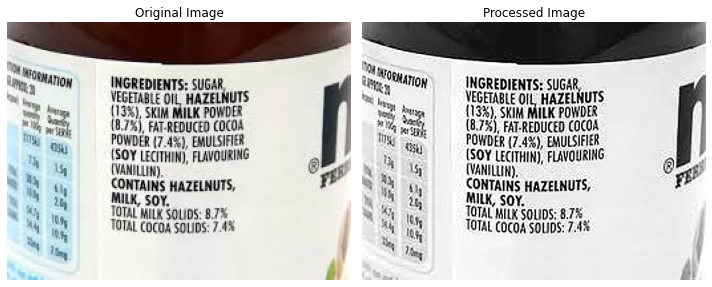

Extracted processed img Text:
INGREDIENTS: SUGAR
VEGETABLE ott HAZELNUTS
(138), SKIM MILK POWDER
(8.7%), FAT-REDUCED COCOA
POWDER (7.4%), EMULSIFIER
(SOY LECITHIN), FLAVOURING
(VANILUIH),

CONTAINS HAZELNUTS,
Mu

SOY.
TOTAL MILK SOLIDS: 8.7%
TOTAL COCOA SOLIDS: 7.4%

i>)
|

Classified Ingredients:
{'Ingredient': 'Cocoa solids', 'Category': 'Natural', 'Description': 'Unprocessed'}


In [79]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import numpy as np
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

# Function to preprocess image for improved OCR accuracy
def preprocess_image_for_ocr(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # Sharpening the Image
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened_image = cv2.filter2D(resized_image, -1, kernel)

    return sharpened_image, cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the image path
image_path = "C:\\Users\\DC\\Desktop\\Sem 7\\NLP\\NLP PROJECT\\img3.jpg"

# Preprocess the image
processed_image, original_image = preprocess_image_for_ocr(image_path)

# Plotting the original and processed images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')
plt.title("Processed Image")
plt.axis('off')

plt.tight_layout()
plt.show()

# Perform OCR on the processed image
text = pytesseract.image_to_string(processed_image)

# Print the extracted text
print("Extracted processed img Text:")
print(text)

# Load ingredient dataset
dataset_path = 'edited_temp.xlsx'
ingredient_data = pd.read_excel(dataset_path)

# Create a dictionary mapping
ingredient_dict = ingredient_data.set_index('Ingredient').to_dict(orient='index')

# Preprocess text and detect ingredients
def preprocess_text(text, ingredient_dict):
    text = re.sub(r'[^A-Za-z0-9 ]+', ' ', text).lower()
    tokens = word_tokenize(text)
    matched_ingredients = set()
    max_ngram_length = max(len(ingredient.split()) for ingredient in ingredient_dict.keys())

    for n in range(1, max_ngram_length + 1):
        for ngram in ngrams(tokens, n):
            phrase = ' '.join(ngram)
            if phrase in ingredient_dict:
                matched_ingredients.add(phrase)

    return list(matched_ingredients)

# Classify ingredients
def classify_ingredients(ingredients, ingredient_dict):
    classifications = []
    for item in ingredients:
        if item in ingredient_dict:
            info = ingredient_dict[item]
            classifications.append({
                'Ingredient': item.capitalize(),
                'Category': info['Category '],
                'Description': info['Description']
            })
        else:
            classifications.append({
                'Ingredient': item.capitalize(),
                'Category': 'Unknown',
                'Description': 'Information not available'
            })
    return classifications

# Process and classify ingredients
ingredients = preprocess_text(text, ingredient_dict)
classified_ingredients = classify_ingredients(ingredients, ingredient_dict)

# Print classified ingredients
print("Classified Ingredients:")
for classified in classified_ingredients:
    print(classified)

In [84]:
from transformers import AutoTokenizer, VisionEncoderDecoderModel

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("jinhybr/OCR-Donut-CORD")
model = VisionEncoderDecoderModel.from_pretrained("jinhybr/OCR-Donut-CORD")



pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

In [82]:
!pip install torch

In [86]:
!pip install transformers

In [89]:
from transformers import pipeline

ocr_pipe = pipeline("image-to-text", model="microsoft/trocr-base-printed")


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

ValueError: Unrecognized feature extractor in microsoft/trocr-base-printed. Should have a `feature_extractor_type` key in its preprocessor_config.json of config.json, or one of the following `model_type` keys in its config.json: audio-spectrogram-transformer, beit, chinese_clip, clap, clip, clipseg, conditional_detr, convnext, cvt, data2vec-audio, data2vec-vision, deformable_detr, deit, detr, dinat, donut-swin, dpt, encodec, flava, glpn, groupvit, hubert, imagegpt, layoutlmv2, layoutlmv3, levit, maskformer, mctct, mobilenet_v1, mobilenet_v2, mobilevit, nat, owlvit, perceiver, poolformer, regnet, resnet, segformer, sew, sew-d, speech_to_text, speecht5, swiftformer, swin, swinv2, table-transformer, timesformer, tvlt, unispeech, unispeech-sat, van, videomae, vilt, vit, vit_mae, vit_msn, wav2vec2, wav2vec2-conformer, wavlm, whisper, xclip, yolos

In [90]:
results = ocr_pipe("C:\\Users\\DC\\Desktop\\Sem 7\\NLP\\NLP PROJECT\\img3.jpg")
print(results[0]['text'])

NameError: name 'ocr_pipe' is not defined

In [88]:
print("hi")

hi


In [95]:
import requests
import json

def ocr_space_file(filename, overlay=False, api_key='K89439998188957', language='eng'):
    payload = {
        'isOverlayRequired': overlay,
        'apikey': api_key,
        'language': language,
    }
    with open(filename, 'rb') as f:
        r = requests.post('https://api.ocr.space/parse/image',
                          files={filename: f},
                          data=payload,
                          )
    return r.content.decode()

def ocr_space_url(url, overlay=False, api_key='K89439998188957', language='eng'):
    payload = {
        'url': url,
        'isOverlayRequired': overlay,
        'apikey': api_key,
        'language': language,
    }
    r = requests.post('https://api.ocr.space/parse/image',
                      data=payload,
                      )
    return r.content.decode()

# Use examples:
test_file = ocr_space_file(filename="C:\\Users\\DC\\Desktop\\Sem 7\\NLP\\NLP PROJECT\\img1.jpg")
print("OCR result from file:")
file_result = json.loads(test_file)
parsed_text_file = file_result["ParsedResults"][0]["ParsedText"]
print("Parsed Text from file:", parsed_text_file)




OCR result from file:
Parsed Text from file: INGREDIENTS: Enriched unbleached
flour (wheat flour, malted barley flour,
astcrblt acid duh conditioner], niacin,
reduced iron, tniarnin mononitrate,
riboflavin, folic acidl sugar, de ermed
yellow cornmeal, salt, leavenin ibakin
soda, sodium acid pyrop\osphatel
soybean oil, honey powder, natural flavor
CONTAINS: Wheat.
May contain milk, eggs, soy and tree nuts.



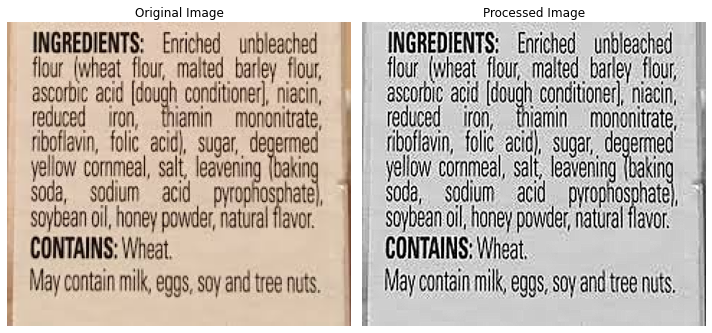

In [15]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
# Data
def preprocess_image_for_ocr(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # Sharpening the Image
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened_image = cv2.filter2D(resized_image, -1, kernel)

    return sharpened_image, cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the image path
image_path = "C:\\Users\\DC\\Desktop\\Sem 7\\NLP\\NLP PROJECT\\img1.jpg"

# Preprocess the image
processed_image, original_image = preprocess_image_for_ocr(image_path)

# Plotting the original and processed images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')
plt.title("Processed Image")
plt.axis('off')

plt.tight_layout()
plt.show()

